In [1]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("Dados/mental_health.sqlite")
df_question = pd.read_sql_query("SELECT * from Question", con)
df_answer = pd.read_sql_query("SELECT * from Answer", con)

con.close()


In [2]:

df_question = df_question.rename(columns={'questionid':'QuestionID'})

frames = [df_answer, df_question]
frames

[                AnswerText  SurveyID  UserID  QuestionID
 0                       37      2014       1           1
 1                       44      2014       2           1
 2                       32      2014       3           1
 3                       31      2014       4           1
 4                       31      2014       5           1
 ...                    ...       ...     ...         ...
 236893               Other      2016    2689         117
 236894             Support      2016    2690         117
 236895  Back-end Developer      2016    2691         117
 236896     DevOps/SysAdmin      2016    2692         117
 236897               Other      2016    2693         117
 
 [236898 rows x 4 columns],
                                           questiontext  QuestionID
 0                                    What is your age?           1
 1                                 What is your gender?           2
 2                         What country do you live in?           3
 3

In [3]:
df = pd.merge(df_answer, df_question)

In [4]:
df

,AnswerText,SurveyID,UserID,QuestionID,questiontext
0,37,2014,1,1,What is your age?
1,44,2014,2,1,What is your age?
2,32,2014,3,1,What is your age?
3,31,2014,4,1,What is your age?
4,31,2014,5,1,What is your age?
...,...,...,...,...,...
236893,Other,2016,2689,117,Which of the following best describes your wor...
236894,Support,2016,2690,117,Which of the following best describes your wor...
236895,Back-end Developer,2016,2691,117,Which of the following best describes your wor...
236896,DevOps/SysAdmin,2016,2692,117,Which of the following best describes your wor...


In [5]:
gender = df.loc[(df.questiontext == 'What is your gender?')]
gender = gender.AnswerText
type(gender)

pandas.core.series.Series

In [15]:
counts = pd.Series(gender).value_counts()
counts

Male                           2830
Female                          914
male                            212
female                          110
-1                               24
                               ... 
genderqueer                       1
none of your business             1
nb masculine                      1
male 9:1 female, roughly          1
Non-binary and gender fluid       1
Name: AnswerText, Length: 101, dtype: int64

In [9]:
from collections import Counter
contador = Counter(gender)
contador

Counter({'Female': 914,
         'Male': 2830,
         'Male-ish': 2,
         'Trans-female': 1,
         'something kinda male?': 1,
         'queer/she/they': 1,
         'non-binary': 6,
         'Nah': 1,
         'All': 1,
         'Enby': 2,
         'fluid': 1,
         'Genderqueer': 4,
         'Androgyne': 1,
         'Agender': 4,
         'Guy (-ish) ^_^': 1,
         'male leaning androgynous': 1,
         'Trans woman': 2,
         'Neuter': 1,
         'Female (trans)': 2,
         'queer': 1,
         'A little about you': 1,
         'p': 1,
         'ostensibly male, unsure what that really means': 1,
         'Bigender': 1,
         'Female assigned at birth': 1,
         'fm': 1,
         'Transitioned, M2F': 1,
         'Genderfluid (born female)': 1,
         'Other/Transfeminine': 1,
         'Female or Multi-Gender Femme': 1,
         'Androgynous': 1,
         'male 9:1 female, roughly': 1,
         '-1': 24,
         'Other': 2,
         'nb masculine': 1,
 

In [57]:
#gender = df.loc[(df.questiontext == 'What is your gender?')]
#dfs = dict(tuple(gender.groupby('AnswerText')))

In [32]:
count_male = pd.Series(gender).value_counts()['Male']
count_male

2830

In [26]:
male = counts.male
female = counts.female
total = female + male

KeyError: 'key of type tuple not found and not a MultiIndex'

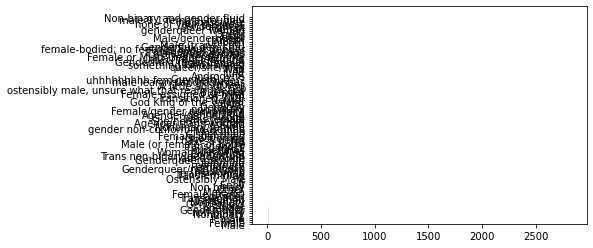

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(y, x, width=1, edgecolor="white", linewidth=0.7)


plt.show()